In [1]:
import ROOT

Welcome to JupyROOT 6.17/01


In [2]:
from Photon_SF_config import *

In [3]:
from ROOT import TFile, TH2F, TCanvas

In [4]:
f  = TFile(Photon_SFUp_path)

In [5]:
f.ls()

TFile**		./DATA/80X_2016_Tight_photons.root	
 TFile*		./DATA/80X_2016_Tight_photons.root	
  KEY: TH2F	EGamma_SF2D;1	e/#gamma scale factors
  KEY: TH2F	EGamma_EffData2D;1	e/#gamma scale factors
  KEY: TH2F	EGamma_EffMC2D;1	e/#gamma scale factors
  KEY: TGraphErrors	grSF1D_0;1	Graph
  KEY: TGraphErrors	grSF1D_1;1	Graph
  KEY: TGraphErrors	grSF1D_2;1	Graph
  KEY: TGraphErrors	grSF1D_3;1	Graph
  KEY: TGraphErrors	grSF1D_4;1	Graph


In [6]:
h = TH2F()

In [7]:
c = TCanvas("SF","SF",800,800)

In [8]:
f.GetObject("EGamma_SF2D",h)

Info in <TCanvas::Print>: pdf file Photon_SF.pdf has been created


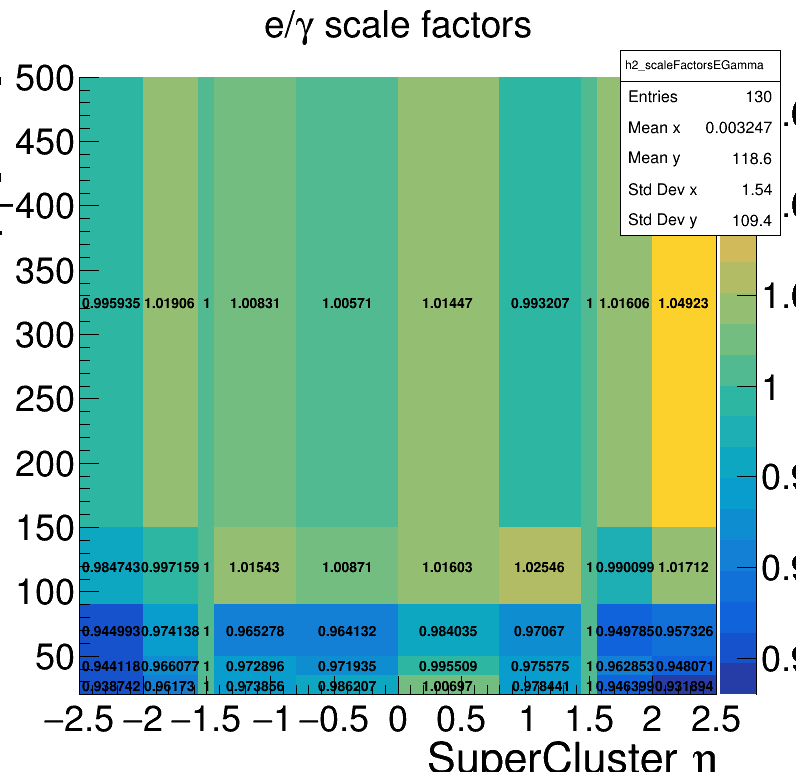

In [9]:
h.Draw("colzText")
c.Draw()
c.SaveAs("Photon_SF.pdf")

In [10]:
nx = h.GetNbinsX()
ny = h.GetNbinsY()
print("# bins X = "+str(nx))
print("# bins X = "+str(ny))

# bins X = 10
# bins X = 5


In [11]:
def find_edges(h,x,y):
    lowedge_x = h.GetXaxis().GetBinLowEdge(x)
    upedge_x  = h.GetXaxis().GetBinUpEdge(x)
    lowedge_y = h.GetYaxis().GetBinLowEdge(y)
    upedge_y  = h.GetYaxis().GetBinUpEdge(y)
    return str(lowedge_x), str(upedge_x), str(lowedge_y), str(upedge_y)

In [12]:
def if_with_two_similar_and(n_tabs=1, low=-1000, up = 1000, value=str(100), name="eta"):
    '''
    n_tabs : number of default tabs
    low    : the lower limit of condition
    up     : the upper limit of condition 
    value  : the return value of if statement
    
    '''
    tabs = str()
    s    = str()
    and_s = " && "
    if_s  = "if( "
    if_ends = "){\n"
    return_s = "return\t"
    block_end = "}"
    
    for i in xrange(0,n_tabs):
        tabs += "\t"
        
    s += tabs+if_s+name+" > "+low+and_s+name+" <= "+up+if_ends
    s += tabs+"\t"+return_s+value+";\n"
    s += tabs+block_end+"\n"        
    return s

In [13]:
dotH_name = "Photon_SFUp.h"
dotC_name = "Photon_SFUp.C"
func_type = "Double_t"
func_name = "photon_SFUp"
x_type = "Double_t"
y_type = "Double_t"
x_name = "eta"
y_name = "pt"

In [14]:
dotH = str()

dotH += "#ifndef "+dotH_name.upper().split(".")[0]+str("_H_INCLUDED\n")
dotH += "#define "+dotH_name.upper().split(".")[0]+str("_H_INCLUDED\n")
dotH += "\n"
dotH += func_type+" "+func_name+"("+x_type+" "+x_name+", "+y_type+" "+y_name+");\n"
dotH += "\n"
dotH += "#endif"
print(dotH)

#ifndef PHOTON_SFUP_H_INCLUDED
#define PHOTON_SFUP_H_INCLUDED

Double_t photon_SFUp(Double_t eta, Double_t pt);

#endif


In [15]:
dotC = str()

dotC += "#include \""+dotH_name+"\"\n\n"
dotC += func_type+" "+func_name+"("+x_type+" "+x_name+", "+y_type+" "+y_name+"){\n"
for x in xrange(1,nx+1):
    for y in xrange(1,ny+1):
        lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,x,y)
        central = h.GetBinContent(x,y)+h.GetBinErrorUp(x,y)
        dotC += "\tif( "
        dotC +=  x_name+" > "+lowedge_x+" && "+x_name+" <= "+upedge_x
        dotC += " && "
        dotC +=  y_name+" > "+lowedge_y+" && "+y_name+" <= "+upedge_y
        dotC += " ){"+"\n"
        dotC += "\t\treturn\t"+str(central)+";\n"
        dotC += "\t}"+"\n"
        
##################
##################
current_bin = 1
lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,current_bin,1)
dotC += "\tif( "+x_name+" <= "+lowedge_x+"){\n"
for y in xrange(1,ny+1):
    lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,current_bin,y)
    central = h.GetBinContent(x,y)+h.GetBinErrorUp(x,y)
    dotC += if_with_two_similar_and(n_tabs=2, low=lowedge_y, up=upedge_y, value=str(central),name=y_name)
dotC +=  "\t}\n"
   
current_bin = nx 
lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,current_bin,1)
dotC += "\tif( "+x_name+" > "+upedge_x+"){\n"
for y in xrange(1,ny+1):
    lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,current_bin,y)
    central = h.GetBinContent(current_bin,y)+h.GetBinErrorUp(current_bin,y)
    dotC += if_with_two_similar_and(n_tabs=2, low=lowedge_y, up=upedge_y, value=str(central),name=x_name)   
dotC +=  "\t}\n"

current_bin = 1
lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,1,current_bin)
dotC += "\tif( "+y_name+" <= "+lowedge_y+"){\n"
for x in xrange(1,nx+1):
    lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,x,current_bin)
    central = h.GetBinContent(x,current_bin)+h.GetBinErrorUp(x,current_bin)
    dotC += if_with_two_similar_and(n_tabs=2, low=lowedge_x, up=upedge_x, value=str(central),name=x_name)
dotC +=  "\t}\n"
   
current_bin = ny 
lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,1,current_bin)
dotC += "\tif( "+y_name+" > "+upedge_y+"){\n"
for x in xrange(1,nx+1):
    lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,x,current_bin)
    central = h.GetBinContent(x,current_bin)+h.GetBinErrorUp(x,current_bin)
    dotC += if_with_two_similar_and(n_tabs=2, low=lowedge_x, up=upedge_x, value=str(central),name=x_name)  
dotC +=  "\t}\n"
##################
#################
lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,1,1)
central = h.GetBinContent(1,1)+h.GetBinErrorUp(1,1)
dotC += "\n\tif( "+x_name+" <= "+lowedge_x+" && "+y_name+" <= "+lowedge_y+"){\n"
dotC += "\t\t return\t"+str(central)+";\n\t}"

lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,nx,1)
central = h.GetBinContent(nx,1)+h.GetBinErrorUp(nx,1)
dotC += "\n\tif( "+x_name+" > "+upedge_x+" && "+y_name+" <= "+lowedge_y+"){\n"
dotC += "\t\t return\t"+str(central)+";\n\t}"

lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,1,ny)
central = h.GetBinContent(1,ny)+h.GetBinErrorUp(1,ny)
dotC += "\n\tif( "+x_name+" <= "+lowedge_x+" && "+y_name+" > "+upedge_y+"){\n"
dotC += "\t\t return\t"+str(central)+";\n\t}"


lowedge_x, upedge_x, lowedge_y, upedge_y = find_edges(h,nx,ny)
central = h.GetBinContent(nx,ny)+h.GetBinErrorUp(nx,ny)
dotC += "\n\tif( "+x_name+" > "+upedge_x+" && "+y_name+" > "+upedge_y+"){\n"
dotC += "\t\t return "+str(central)+";\n\t}"

##################

dotC += "\n\telse cout<<\"ERROR: UNEXPEDTED behavior in photon_SF function\"<<endl;\n"
dotC += "\n\treturn\t1000000;\n"
dotC+="}"

In [16]:
def write_code(name,s):
    code_file = file(name,"w")
    code_file.write(s)
    code_file.close()
    
write_code(dotH_name,dotH)
write_code(dotC_name,dotC)